In [57]:
#importing the dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [36]:
#importing the data from the CSV file 
df = pd.read_csv('Advertising.csv')

In [37]:
#First 5 initial rows of the dataset 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [38]:
#shape of the dataset 
df.shape 

(200, 4)

In [39]:
#getting the statistical measure of the data 
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [40]:
# getting the info for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [41]:
#checkng the null values 
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

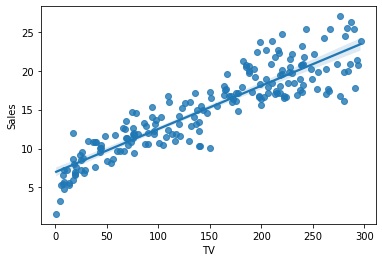

In [42]:
#ploting the relation TV and Sales using seaborn liabrary (regression plot )
sns.regplot(x='TV', y='Sales',data=df)

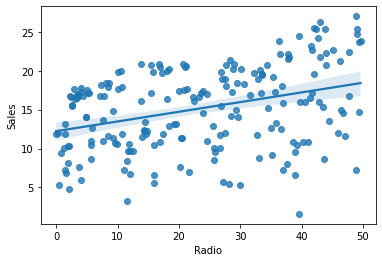

In [43]:
#plotting the relation of the radio and sales 
sns.regplot(x='Radio',y='Sales',data=df)

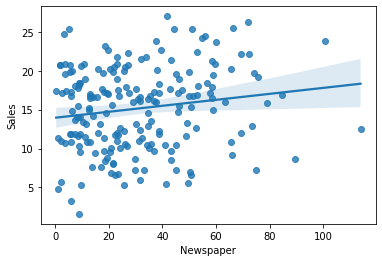

In [44]:
#plottng the relation of the Newspaper and sales 
sns.regplot(x='Newspaper',y='Sales',data=df)

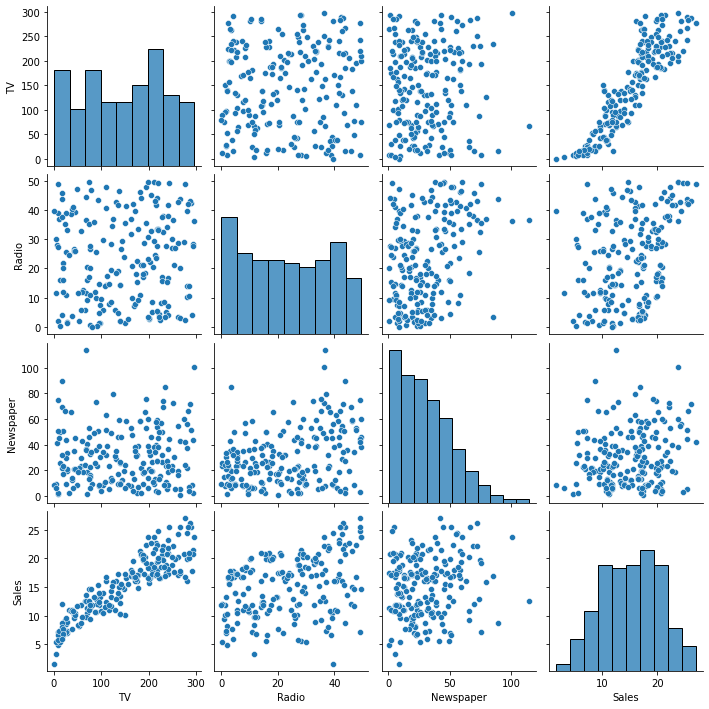

In [45]:
#pairplotting of the data 
sns.pairplot(df)

In [46]:
#getting the corellation with the data 
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<function matplotlib.pyplot.show>

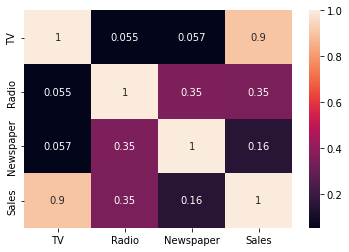

In [47]:
#using the heatmap to plot the correlation 
sns.heatmap(df.corr(),annot =True)
plt.show 

**From the previous anylysis wwe gwt to know that the variable TV is the most correlated with the sales , so i will perform the Linear regression using the TV as the Feature variable**

In [48]:
#Seprating the data and Labels 
x = df.iloc[:,0:1].values 
y = df.iloc[:,3].values 

In [87]:
#train test Spilit 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=42)
print(x.shape ,x_train.shape ,x_test.shape)

(200, 1) (160, 1) (40, 1)


In [88]:
#training the model 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit (x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [89]:
x_test_predict= xgb_model.predict(x_test)
print(x_test_predict)

[17.285233  18.758448  20.700855   6.0120564 19.065748  12.1062155
 19.205235  10.255431  18.182003  16.988289   8.530357  10.524919
 18.958456   3.2984247 13.563488  16.988289   6.0046434 18.376717
 12.1062155 18.958456  20.583113  11.681987   9.2377205 19.197643
 11.681987  10.524919  18.575293  13.563488  12.617513   5.6707544
 18.376717  11.681987  18.376717   8.096788  22.234844  18.958456
 10.255431  19.316534  13.140023   8.602547 ]


In [90]:
#getting the score of the model 
xgb_model.score(x_train,y_train)*100

92.10324923941646

In [91]:
xgb_model.score(x_test,y_test)*100

82.57013207823474

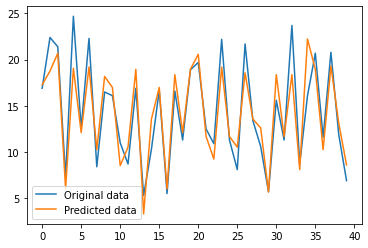

In [94]:
#plotting the tested and predicted data 
plt.plot(y_test,label = 'Original data')
plt.plot(x_test_predict,label = 'Predicted data')
plt.legend()
plt.show()